# Proyecto integrador 1
## Proyecto de analisis de imagenes
## Integrantes:

   - Juliana Ochoa Ramirez
   - Javier Arturo Rozo Alzate
   - Mateo Graciano
   - Cristian David Muñoz Mora
   - Juan Mauricio Cuscagua López
 

## Librerias usadas en el proyecto y funciones creadas utiles

In [1]:
import cv2 # Lee las imagenes jpg
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from skimage.measure import  compare_ssim
from collections import Counter


def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=True,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = ['faces','outliers']#classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)


# Lectura y preprocesamiento de datos

In [2]:
#List all image files
import glob
image_list = []
base1='input/faces94/*'
male=[]
female=[]
n_im=0
for root1 in glob.glob(base1):
    base2=root1+'/*'
    for (root2) in glob.glob(base2):
        base3=root2+'/*.jpg'
        for (root3) in glob.glob(base3):
            image_list.append(root3)
            if('/male/'in root3):
                male.append(n_im)
            if('/female/'in root3):
                female.append(n_im)
            if('/malestaff/'in root3):
                male.append(n_im)
            n_im+=1

# Make a whole matrix with all dataset 180x180*num_images
data_set=np.zeros((len(image_list),180,180))
for image in range(len(image_list)):
    data_set[image,:,:]=cv2.cvtColor(cv2.resize(cv2.imread(image_list[image]),(180, 180)),cv2.COLOR_BGR2GRAY)

outlier_list = []
base1='input/Outliers/*'
for root1 in glob.glob(base1):
    outlier_list.append(root1)
    
data_set_out=np.zeros((len(outlier_list),180,180))
for image in range(len(outlier_list)):
    data_set_out[image,:,:]=cv2.cvtColor(cv2.resize(cv2.imread(outlier_list[image]),(180, 180)),cv2.COLOR_BGR2GRAY)


# Exploración de datos

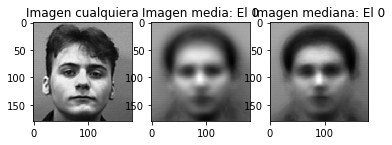

In [3]:
fig, axs = plt.subplots(nrows=1, ncols=3)
axs[0].imshow(data_set[2500,:,:], cmap = plt.cm.gray) #check
axs[0].set_title('Imagen cualquiera')
#plt.show()

mean_face=np.mean(data_set, axis=0)
axs[1].imshow(mean_face ,cmap = plt.cm.gray) #check
axs[1].set_title('Imagen media: El 0')

median_face=np.median(data_set, axis=0)
axs[2].imshow(median_face ,cmap = plt.cm.gray) #check
axs[2].set_title('Imagen mediana: El 0')

plt.show()



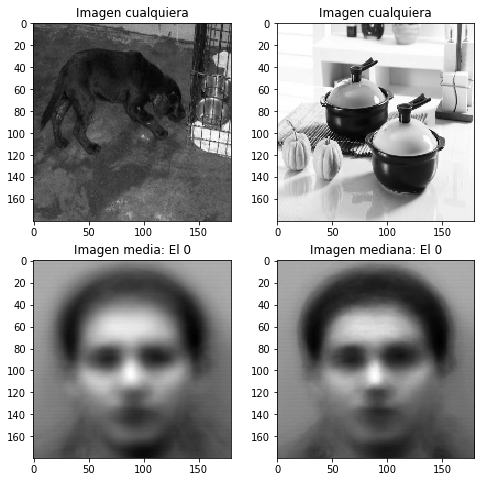

In [24]:
plt.rcParams['figure.figsize'] = [8,8]


data_set_aum=np.append(data_set,data_set_out,axis=0)

fig, axs = plt.subplots(nrows=2, ncols=2)

axs[0,0].imshow(data_set_aum[-3,:,:], cmap = plt.cm.gray) #check
axs[0,0].set_title('Imagen cualquiera')
#plt.show()

axs[0,1].imshow(data_set_aum[-1,:,:], cmap = plt.cm.gray) #check
axs[0,1].set_title('Imagen cualquiera')

mean_face=np.mean(data_set_aum, axis=0)
axs[1,0].imshow(mean_face ,cmap = plt.cm.gray) #check
axs[1,0].set_title('Imagen media: El 0')

median_face=np.median(data_set_aum, axis=0)
axs[1,1].imshow(median_face ,cmap = plt.cm.gray) #check
axs[1,1].set_title('Imagen mediana: El 0')

plt.show()

# Distancias sobre imagenes
## Metrica Euclidiana
### Distribución de las normas


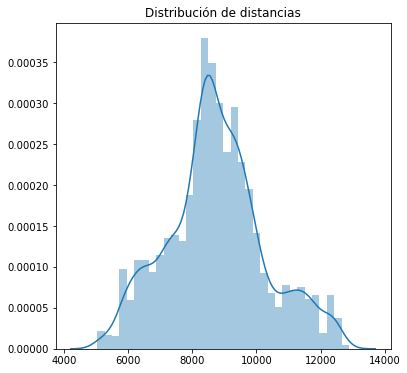

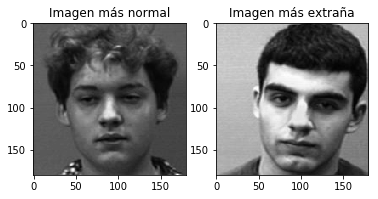

In [25]:
plt.rcParams['figure.figsize'] = [6,6]


cero=np.mean(data_set, axis=0)
distances=np.linalg.norm(data_set-cero, ord=None, axis=(1,2), keepdims=False)

sns.distplot(distances)
plt.title('Distribución de distancias')
plt.show()

orden=np.argsort(np.array(distances))

fig, axs = plt.subplots(nrows=1, ncols=2)
axs[0].imshow(data_set[orden[0],:,:], cmap = plt.cm.gray) #check
axs[0].set_title('Imagen más normal')
#plt.show()

axs[1].imshow(data_set[orden[-1],:,:], cmap = plt.cm.gray) #check
axs[1].set_title('Imagen más extraña')
plt.show();

### Se identifican los outliers?

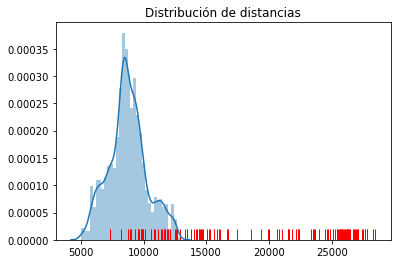

Normalized confusion matrix


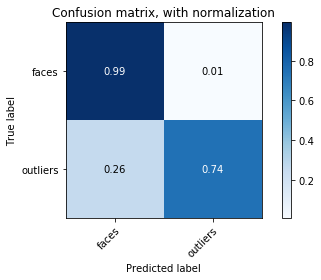

In [6]:

distances_out=np.linalg.norm(data_set_out-cero, ord=None, axis=(1,2), keepdims=False)

sns.distplot(distances)
sns.rugplot(distances_out,color="r")
plt.title('Distribución de distancias')
plt.show();

distances=np.concatenate((distances,distances_out))

LI= np.percentile(distances,25)-1.5*(np.percentile(distances,75)-np.percentile(distances,25))
LS= np.percentile(distances,75)+1.5*(np.percentile(distances,75)-np.percentile(distances,25))

outliers = np.argwhere( (distances> LS))

L_Faces=np.zeros(data_set.shape[0])
L_Out=np.ones(data_set_out.shape[0])
L=np.concatenate((L_Faces,L_Out))

LOut=Counter(L[outliers[:,0]])
Outliers={"Fotos que son Outliers":LOut[0], "Verdaderos outliers": LOut[1]}
Fotos={"Verdaderas Fotos":len(data_set)-LOut[0], "Outliers que son fotos":len(data_set_out)-LOut[1]}

#print(Outliers)
#print(Fotos)

L2=np.zeros(L.shape[0])
for i in outliers:
    L2[i]=1

plot_confusion_matrix(L,L2, classes=['faces','outliers'],
                      title='Confusion matrix, with normalization')

### Se identifican los outliers si los incluimos en desde el comiezo?

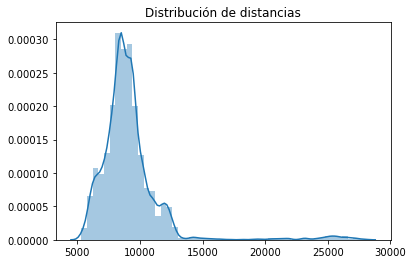

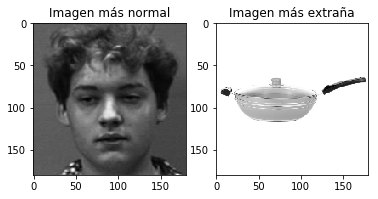

Normalized confusion matrix


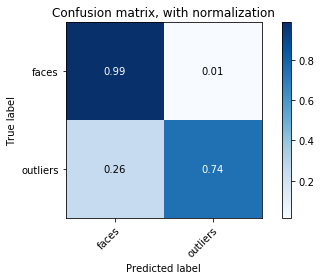

In [7]:
cero=np.mean(data_set_aum, axis=0)
distances=np.linalg.norm(data_set_aum-cero, ord=None, axis=(1,2), keepdims=False)

sns.distplot(distances)
plt.title('Distribución de distancias')
plt.show();

orden=np.argsort(np.array(distances))

fig, axs = plt.subplots(nrows=1, ncols=2)
axs[0].imshow(data_set_aum[orden[0],:,:], cmap = plt.cm.gray) #check
axs[0].set_title('Imagen más normal')
#plt.show()

axs[1].imshow(data_set_aum[orden[-1],:,:], cmap = plt.cm.gray) #check
axs[1].set_title('Imagen más extraña')
plt.show();



LI= np.percentile(distances,25)-1.5*(np.percentile(distances,75)-np.percentile(distances,25))
LS= np.percentile(distances,75)+1.5*(np.percentile(distances,75)-np.percentile(distances,25))

outliers = np.argwhere( (distances> LS))

L_Faces=np.zeros(data_set.shape[0])
L_Out=np.ones(data_set_out.shape[0])
L=np.concatenate((L_Faces,L_Out))

LOut=Counter(L[outliers[:,0]])
Outliers={"Fotos que son Outliers":LOut[0], "Verdaderos outliers": LOut[1]}
Fotos={"Verdaderas Fotos":len(data_set)-LOut[0], "Outliers que son fotos":len(data_set_out)-LOut[1]}

#print(Outliers)
#print(Fotos)

L2=np.zeros(L.shape[0])
for i in outliers:
    L2[i]=1

plot_confusion_matrix(L,L2, classes=['faces','outliers'],
                      title='Confusion matrix, with normalization')


## Metrica de Manhattan

### Distribución de las normas

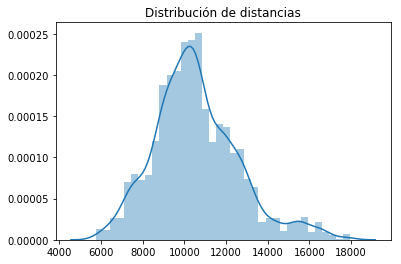

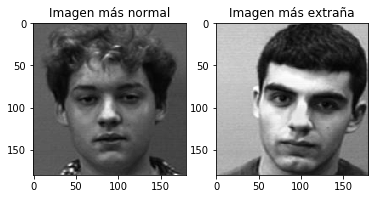

In [8]:
cero=np.mean(data_set, axis=0)
distances=np.linalg.norm(data_set-cero, ord=1, axis=(1,2), keepdims=False)

sns.distplot(distances)
plt.title('Distribución de distancias')
plt.show()

orden=np.argsort(np.array(distances))

fig, axs = plt.subplots(nrows=1, ncols=2)
axs[0].imshow(data_set[orden[0],:,:], cmap = plt.cm.gray) #check
axs[0].set_title('Imagen más normal')
#plt.show()

axs[1].imshow(data_set[orden[-1],:,:], cmap = plt.cm.gray) #check
axs[1].set_title('Imagen más extraña')
plt.show()

### Se identifican los outliers?

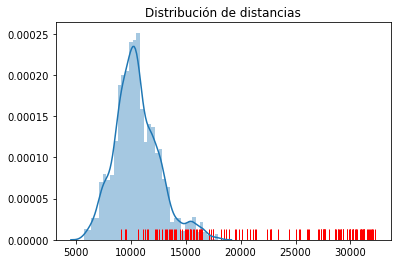

Normalized confusion matrix


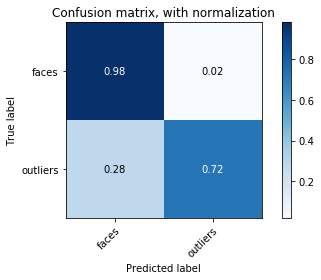

In [9]:

distances_out=np.linalg.norm(data_set_out-cero, ord=1, axis=(1,2), keepdims=False)

sns.distplot(distances)
sns.rugplot(distances_out,color="r")
plt.title('Distribución de distancias')
plt.show()

distances=np.concatenate((distances,distances_out))

LI= np.percentile(distances,25)-1.5*(np.percentile(distances,75)-np.percentile(distances,25))
LS= np.percentile(distances,75)+1.5*(np.percentile(distances,75)-np.percentile(distances,25))

outliers = np.argwhere( (distances> LS))

L_Faces=np.zeros(data_set.shape[0])
L_Out=np.ones(data_set_out.shape[0])
L=np.concatenate((L_Faces,L_Out))

LOut=Counter(L[outliers[:,0]])
Outliers={"Fotos que son Outliers":LOut[0], "Verdaderos outliers": LOut[1]}
Fotos={"Verdaderas Fotos":len(data_set)-LOut[0], "Outliers que son fotos":len(data_set_out)-LOut[1]}

#print(Outliers)
#print(Fotos)

L2=np.zeros(L.shape[0])
for i in outliers:
    L2[i]=1

plot_confusion_matrix(L,L2, classes=['faces','outliers'],
                      title='Confusion matrix, with normalization')

### Se identifican los outliers si los incluimos en desde el comiezo?

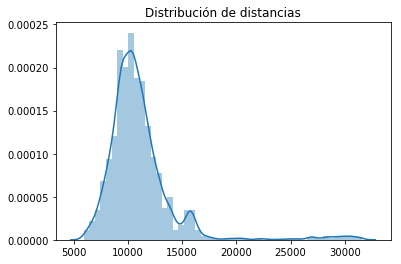

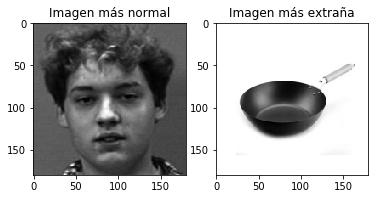

Normalized confusion matrix


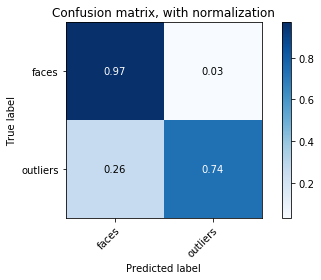

In [10]:
cero=np.mean(data_set_aum, axis=0)
distances=np.linalg.norm(data_set_aum-cero, ord=1, axis=(1,2), keepdims=False)

sns.distplot(distances)
plt.title('Distribución de distancias')
plt.show()

orden=np.argsort(np.array(distances))

fig, axs = plt.subplots(nrows=1, ncols=2)
axs[0].imshow(data_set_aum[orden[0],:,:], cmap = plt.cm.gray) #check
axs[0].set_title('Imagen más normal')
#plt.show()

axs[1].imshow(data_set_aum[orden[-1],:,:], cmap = plt.cm.gray) #check
axs[1].set_title('Imagen más extraña')
plt.show()

LI= np.percentile(distances,25)-1.5*(np.percentile(distances,75)-np.percentile(distances,25))
LS= np.percentile(distances,75)+1.5*(np.percentile(distances,75)-np.percentile(distances,25))

outliers = np.argwhere( (distances> LS))

L_Faces=np.zeros(data_set.shape[0])
L_Out=np.ones(data_set_out.shape[0])
L=np.concatenate((L_Faces,L_Out))

LOut=Counter(L[outliers[:,0]])
Outliers={"Fotos que son Outliers":LOut[0], "Verdaderos outliers": LOut[1]}
Fotos={"Verdaderas Fotos":len(data_set)-LOut[0], "Outliers que son fotos":len(data_set_out)-LOut[1]}

#print(Outliers)
#print(Fotos)

L2=np.zeros(L.shape[0])
for i in outliers:
    L2[i]=1

plot_confusion_matrix(L,L2, classes=['faces','outliers'],
                      title='Confusion matrix, with normalization')


## Chessboard

### Distribución de las normas

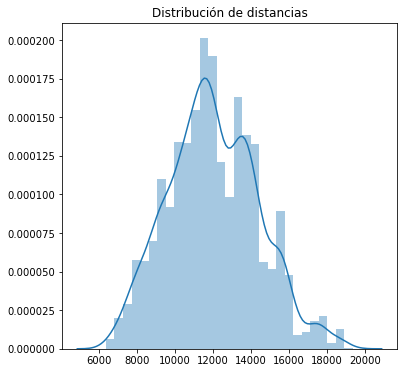

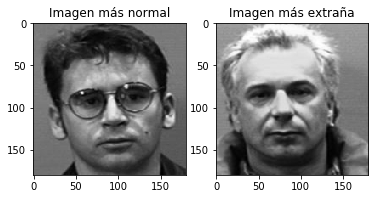

In [26]:
cero=np.mean(data_set, axis=0)
distances=np.linalg.norm(data_set-cero, ord=np.inf, axis=(1,2), keepdims=False)

sns.distplot(distances)
plt.title('Distribución de distancias')
plt.show()

orden=np.argsort(np.array(distances))

fig, axs = plt.subplots(nrows=1, ncols=2)
axs[0].imshow(data_set[orden[0],:,:], cmap = plt.cm.gray) #check
axs[0].set_title('Imagen más normal')
#plt.show()

axs[1].imshow(data_set[orden[-1],:,:], cmap = plt.cm.gray) #check
axs[1].set_title('Imagen más extraña')
plt.show()

### Se identifican los outliers?

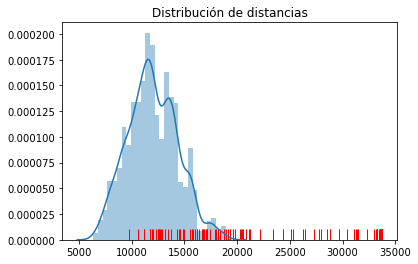

Normalized confusion matrix


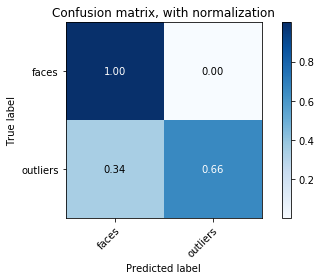

In [12]:
distances_out=np.linalg.norm(data_set_out-cero, ord=np.inf, axis=(1,2), keepdims=False)

sns.distplot(distances)
sns.rugplot(distances_out,color="r")
plt.title('Distribución de distancias')
plt.show()

distances=np.concatenate((distances,distances_out))

LI= np.percentile(distances,25)-1.5*(np.percentile(distances,75)-np.percentile(distances,25))
LS= np.percentile(distances,75)+1.5*(np.percentile(distances,75)-np.percentile(distances,25))

outliers = np.argwhere(  (distances> LS))

L_Faces=np.zeros(data_set.shape[0])
L_Out=np.ones(data_set_out.shape[0])
L=np.concatenate((L_Faces,L_Out))

LOut=Counter(L[outliers[:,0]])
Outliers={"Fotos que son Outliers":LOut[0], "Verdaderos outliers": LOut[1]}
Fotos={"Verdaderas Fotos":len(data_set)-LOut[0], "Outliers que son fotos":len(data_set_out)-LOut[1]}

#print(Outliers)
#print(Fotos)

L2=np.zeros(L.shape[0])
for i in outliers:
    L2[i]=1

plot_confusion_matrix(L,L2, classes=['faces','outliers'],
                      title='Confusion matrix, with normalization')


### Se identifican los outliers si los incluimos en desde el comiezo?

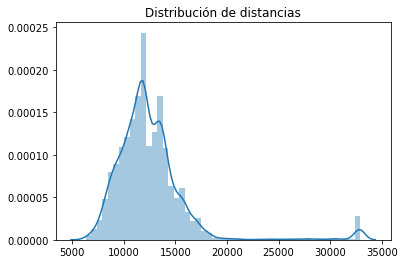

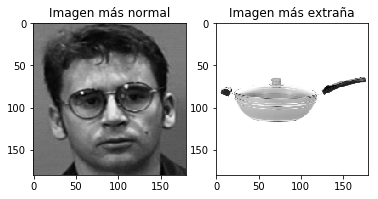

Normalized confusion matrix


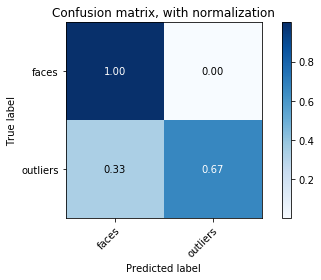

In [13]:
cero=np.mean(data_set_aum, axis=0)
distances=np.linalg.norm(data_set_aum-cero, ord=np.inf, axis=(1,2), keepdims=False)

sns.distplot(distances)
plt.title('Distribución de distancias')
plt.show()

orden=np.argsort(np.array(distances))

fig, axs = plt.subplots(nrows=1, ncols=2)
axs[0].imshow(data_set_aum[orden[0],:,:], cmap = plt.cm.gray) #check
axs[0].set_title('Imagen más normal')
#plt.show()

axs[1].imshow(data_set_aum[orden[-1],:,:], cmap = plt.cm.gray) #check
axs[1].set_title('Imagen más extraña')
plt.show()



LI= np.percentile(distances,25)-1.5*(np.percentile(distances,75)-np.percentile(distances,25))
LS= np.percentile(distances,75)+1.5*(np.percentile(distances,75)-np.percentile(distances,25))

outliers = np.argwhere( (distances> LS))

L_Faces=np.zeros(data_set.shape[0])
L_Out=np.ones(data_set_out.shape[0])
L=np.concatenate((L_Faces,L_Out))

LOut=Counter(L[outliers[:,0]])
Outliers={"Fotos que son Outliers":LOut[0], "Verdaderos outliers": LOut[1]}
Fotos={"Verdaderas Fotos":len(data_set)-LOut[0], "Outliers que son fotos":len(data_set_out)-LOut[1]}

#print(Outliers)
#print(Fotos)

L2=np.zeros(L.shape[0])
for i in outliers:
    L2[i]=1

plot_confusion_matrix(L,L2, classes=['faces','outliers'],
                      title='Confusion matrix, with normalization')

## SSIM
### Distribución de las normas

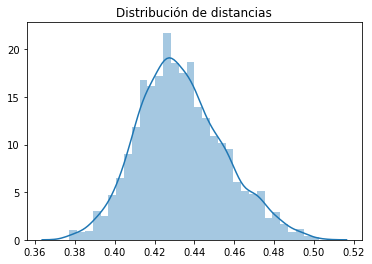

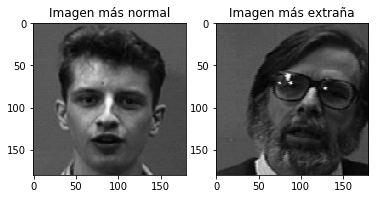

In [14]:
cero=np.mean(data_set, axis=0)
distances=[]
for image in range(data_set.shape[0]):
    #print(image)
    #distances.append(directed_hausdorff(cero,data_set[image,:,:])[0])
    sim=compare_ssim(cero,data_set[image,:,:])
    dis=(1-sim)/2
    distances.append(dis)

sns.distplot(distances)
plt.title('Distribución de distancias')
plt.show()

orden=np.argsort(np.array(distances))

fig, axs = plt.subplots(nrows=1, ncols=2)
axs[0].imshow(data_set[orden[0],:,:], cmap = plt.cm.gray) #check
axs[0].set_title('Imagen más normal')
#plt.show()

axs[1].imshow(data_set[orden[-1],:,:], cmap = plt.cm.gray) #check
axs[1].set_title('Imagen más extraña')
plt.show()

### Se identifican los outliers?

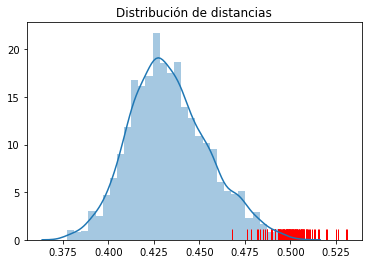

Normalized confusion matrix


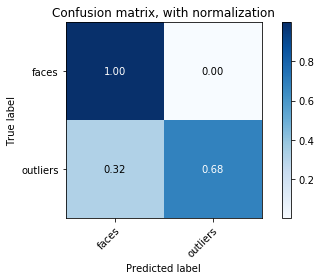

In [15]:

distances_out=[]
for image in range(data_set_out.shape[0]):
    #print(image)
    sim=compare_ssim(cero,data_set_out[image,:,:])
    dis=(1-sim)/2
    distances_out.append(dis)

sns.distplot(distances)
sns.rugplot(distances_out,color="r")
plt.title('Distribución de distancias')
plt.show()

distances=np.concatenate((distances,distances_out))

LI= np.percentile(distances,25)-1.5*(np.percentile(distances,75)-np.percentile(distances,25))
LS= np.percentile(distances,75)+1.5*(np.percentile(distances,75)-np.percentile(distances,25))

outliers = np.argwhere(  (distances> LS))

L_Faces=np.zeros(data_set.shape[0])
L_Out=np.ones(data_set_out.shape[0])
L=np.concatenate((L_Faces,L_Out))

LOut=Counter(L[outliers[:,0]])
Outliers={"Fotos que son Outliers":LOut[0], "Verdaderos outliers": LOut[1]}
Fotos={"Verdaderas Fotos":len(data_set)-LOut[0], "Outliers que son fotos":len(data_set_out)-LOut[1]}

#print(Outliers)
#print(Fotos)

L2=np.zeros(L.shape[0])
for i in outliers:
    L2[i]=1

plot_confusion_matrix(L,L2, classes=['faces','outliers'],
                      title='Confusion matrix, with normalization')



### Se identifican los outliers si los incluimos en desde el comiezo?

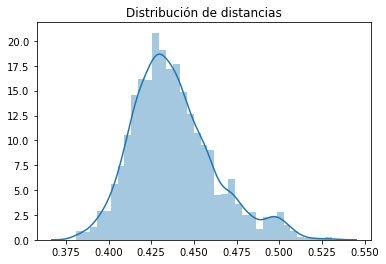

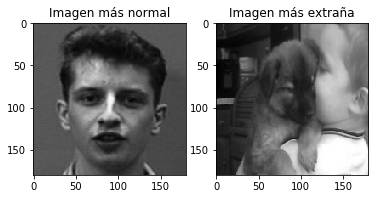

Normalized confusion matrix


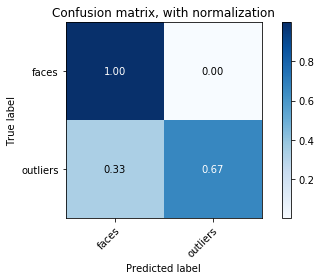

In [16]:
cero=np.mean(data_set_aum, axis=0)
distances=[]
for image in range(data_set_aum.shape[0]):
    #print(image)
    sim=compare_ssim(cero,data_set_aum[image,:,:])
    dis=(1-sim)/2
    distances.append(dis)

sns.distplot(distances)
plt.title('Distribución de distancias')
plt.show()

orden=np.argsort(np.array(distances))

fig, axs = plt.subplots(nrows=1, ncols=2)
axs[0].imshow(data_set_aum[orden[0],:,:], cmap = plt.cm.gray) #check
axs[0].set_title('Imagen más normal')
#plt.show()

axs[1].imshow(data_set_aum[orden[-1],:,:], cmap = plt.cm.gray) #check
axs[1].set_title('Imagen más extraña')
plt.show()

LI= np.percentile(distances,25)-1.5*(np.percentile(distances,75)-np.percentile(distances,25))
LS= np.percentile(distances,75)+1.5*(np.percentile(distances,75)-np.percentile(distances,25))

outliers = np.argwhere(  (distances> LS))

L_Faces=np.zeros(data_set.shape[0])
L_Out=np.ones(data_set_out.shape[0])
L=np.concatenate((L_Faces,L_Out))

LOut=Counter(L[outliers[:,0]])
Outliers={"Fotos que son Outliers":LOut[0], "Verdaderos outliers": LOut[1]}
Fotos={"Verdaderas Fotos":len(data_set)-LOut[0], "Outliers que son fotos":len(data_set_out)-LOut[1]}

#print(Outliers)
#print(Fotos)

L2=np.zeros(L.shape[0])
for i in outliers:
    L2[i]=1

plot_confusion_matrix(L,L2, classes=['faces','outliers'],
                      title='Confusion matrix, with normalization')